In [1]:
import sys
sys.path.append(r"/Users/mocquin/MYLIB10/MODULES/quantities-comparison/")

In [2]:
%matplotlib inline

In [3]:
from benchmarks.base import BenchNumpy

# Bench Numpy

In [4]:
bn = BenchNumpy()

In [5]:
print(bn.unary_ops)
print(bn.binary_ops)

[<built-in function abs>, <built-in function neg>, <built-in function pos>]
[<built-in function add>, <built-in function sub>, <built-in function mul>, <built-in function floordiv>, <built-in function floordiv>, <built-in function truediv>, <built-in function mod>, <built-in function pow>, <built-in function lt>, <built-in function le>, <built-in function eq>, <built-in function ne>, <built-in function ge>, <built-in function gt>]


In [4]:
import run_comparison
results = run_comparison.get_pandas()

BenchAstropy
BenchPint
BenchPhysipy
BenchForallpeople


In [5]:
results['facts']

,LOC,First release,Most recent release,Implementation,URL,PyPI
astropy.units,3448,2013-01,2013-05,Container,https://astropy.readthedocs.org/en/latest/units/index.html,astropy
pint,2914,2012-07,2014-02,Container,https://pint.readthedocs.org/en/latest/,pint
physipy,0,20XX-XX,20XX-XX,Container?,,physipy
forallpeople,0,20XX-XX,20XX-XX,Container?,,forallpeople


In [6]:
results['syntax']

,make,print
astropy.units,multiply,5.0 m
pint,multiply,5.0 meter
physipy,multiply,5.0 m
forallpeople,multiply,5.000 m


In [7]:
results['compatibility']['syntax']

,print,shape
astropy.units,[ 5. 10.] m,"(2,)"
pint,[5.0 10.0] meter,"(2,)"
physipy,[ 5. 10.] m,"(2,)"
forallpeople,False,False


In [8]:
results['compatibility']['unary_ops']

,abs,neg,pos
astropy.units,True,True,True
pint,True,True,True
physipy,True,True,True
forallpeople,True,True,True


In [9]:
results['compatibility']['binary_same_ops']

,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,True,True,True,True,True,True,False,True,True,True,True,True,True
pint,True,True,True,True,True,True,False,True,True,True,True,True,True
physipy,True,True,True,True,True,True,False,True,True,True,True,True,True
forallpeople,True,True,True,False,True,False,False,True,True,True,True,True,True


In [10]:
results['compatibility']['binary_compatible_ops']

,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,True,True,True,True,True,True,False,True,True,True,True,True,True
pint,True,True,True,True,True,True,False,True,True,True,True,True,True
physipy,True,True,True,True,True,True,False,True,True,True,True,True,True
forallpeople,True,True,True,False,True,False,False,True,True,True,True,True,True


In [11]:
results['compatibility']['binary_different_ops']

,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,False,False,True,False,True,False,False,False,False,True,True,False,False
pint,False,False,True,False,True,False,False,False,False,True,True,False,False
physipy,False,False,True,False,True,False,False,False,False,True,True,False,False
forallpeople,False,False,True,False,True,False,False,False,False,True,True,False,False


In [12]:
results['compatibility']['unary_ufuncs']

,negative,absolute,rint,sign,conjugate,exp,exp2,log,log2,log10,expm1,log1p,sqrt,square,reciprocal,ones_like,sin,cos,tan,arcsin,arccos,arctan,sinh,cosh,tanh,arcsinh,arccosh,arctanh,deg2rad,rad2deg,floor,ceil,trunc
astropy.units,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
pint,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
physipy,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
forallpeople,True,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [15]:
results['compatibility']['binary_same_ufuncs']

,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
pint,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
physipy,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
forallpeople,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


In [16]:
results['compatibility']['binary_compatible_ufuncs']

,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
pint,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
physipy,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
forallpeople,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


In [17]:
results['compatibility']['binary_different_ufuncs']

,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pint,False,False,True,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False
physipy,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
forallpeople,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
results['compatibility']['other_numpy']

,where,sort,argsort,concatenate,mean,std,median
astropy.units,True,True,True,True,True,True,True
pint,True,True,True,True,True,True,True
physipy,True,True,True,True,True,True,True
forallpeople,True,True,True,True,True,False,True


<AxesSubplot:>

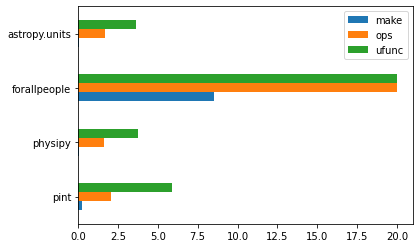

In [14]:
results['speed']['mean'].sort_index(ascending=False).plot(kind='barh')

<AxesSubplot:>

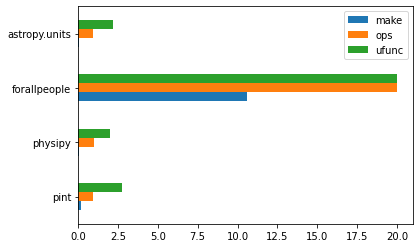

In [15]:
results['speed']['std'].sort_index(ascending=False).plot(kind='barh')

<AxesSubplot:>

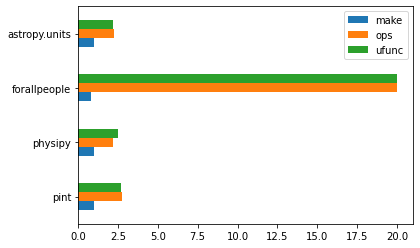

In [16]:
results['speed']['np_rel'].sort_index(ascending=False).plot(kind='barh')